# PM4PY

In [92]:
#!pip install pm4py
import pm4py

In [56]:
logs = pm4py.read_xes('running_example.xes')
logs.head()

parsing log, completed traces ::   0%|          | 0/6 [00:00<?, ?it/s]

,concept:name,org:resource,time:timestamp,Activity,Resource,Costs,case:concept:name
0,register request,Pete,2010-12-30 14:32:00+00:00,register request,Pete,50,3
1,examine casually,Mike,2010-12-30 15:06:00+00:00,examine casually,Mike,400,3
2,check ticket,Ellen,2010-12-30 16:34:00+00:00,check ticket,Ellen,100,3
3,decide,Sara,2011-01-06 09:18:00+00:00,decide,Sara,200,3
4,reinitiate request,Sara,2011-01-06 12:18:00+00:00,reinitiate request,Sara,200,3


### Предварительный анализ

In [59]:
logs.dtypes

concept:name                      object
org:resource                      object
time:timestamp       datetime64[ns, UTC]
Activity                          object
Resource                          object
Costs                             object
case:concept:name                 object
dtype: object

In [61]:
logs.isna().sum()

concept:name         0
org:resource         0
time:timestamp       0
Activity             0
Resource             0
Costs                0
case:concept:name    0
dtype: int64

In [63]:
logs['concept:name'].unique()

array(['register request', 'examine casually', 'check ticket', 'decide',
       'reinitiate request', 'examine thoroughly', 'pay compensation',
       'reject request'], dtype=object)

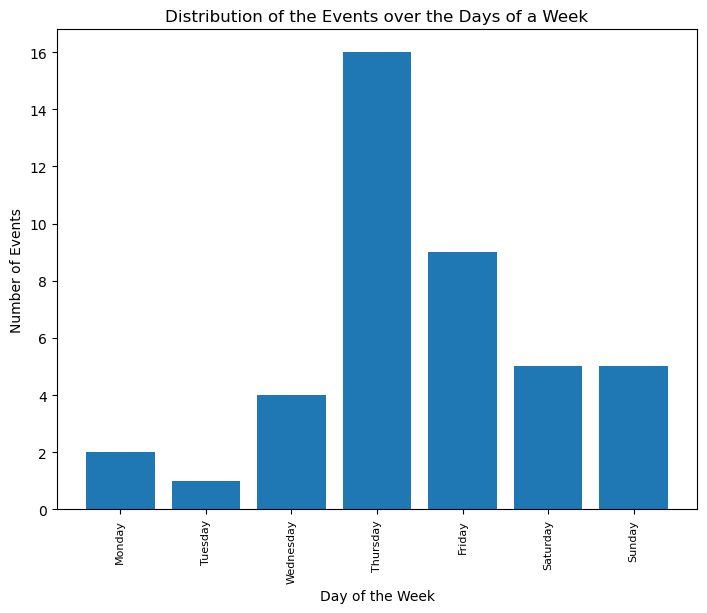

In [65]:
# Кол-во событий по дням недели
pm4py.view_events_distribution_graph(logs, distr_type = 'days_week')

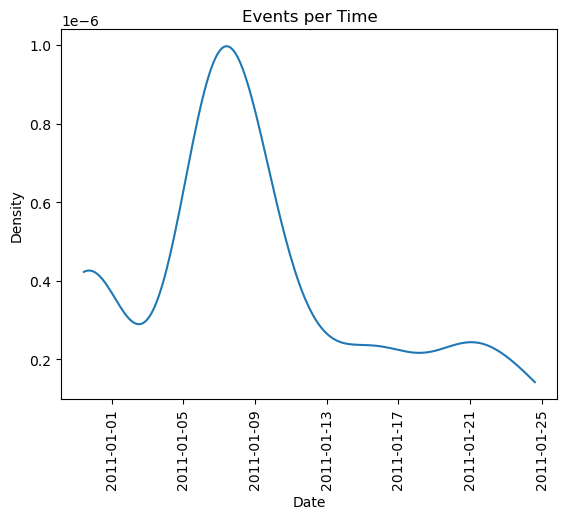

In [67]:
# Распределение событий по дням
pm4py.view_events_per_time_graph(logs)

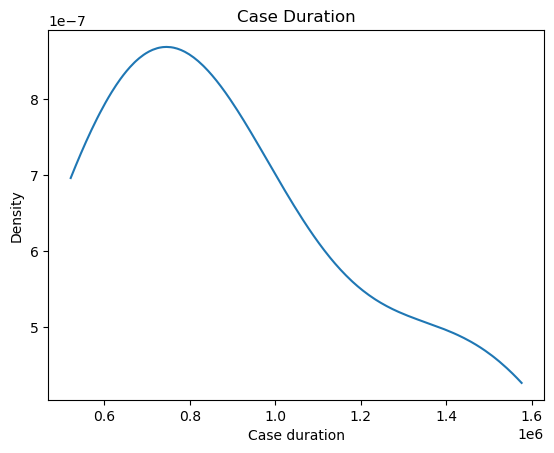

In [68]:
# Распределение продолжительности события
pm4py.view_case_duration_graph(logs)

### Process tree

In [72]:
process_tree = pm4py.discover_process_tree_inductive(logs)
process_tree

->( 'register request', *( ->( +( 'check ticket', X( 'examine thoroughly', 'examine casually' ) ), 'decide' ), 'reinitiate request' ), X( 'reject request', 'pay compensation' ) )

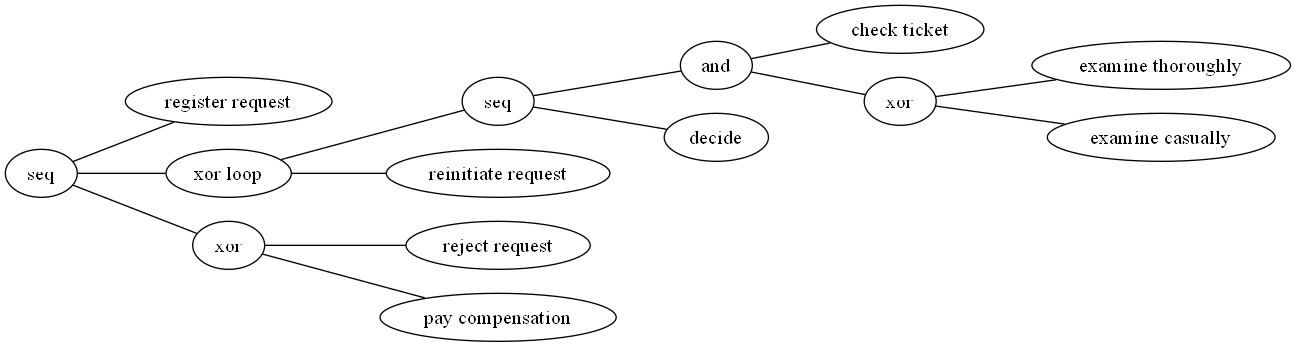

In [74]:
pm4py.view_process_tree(process_tree)

### BPMN

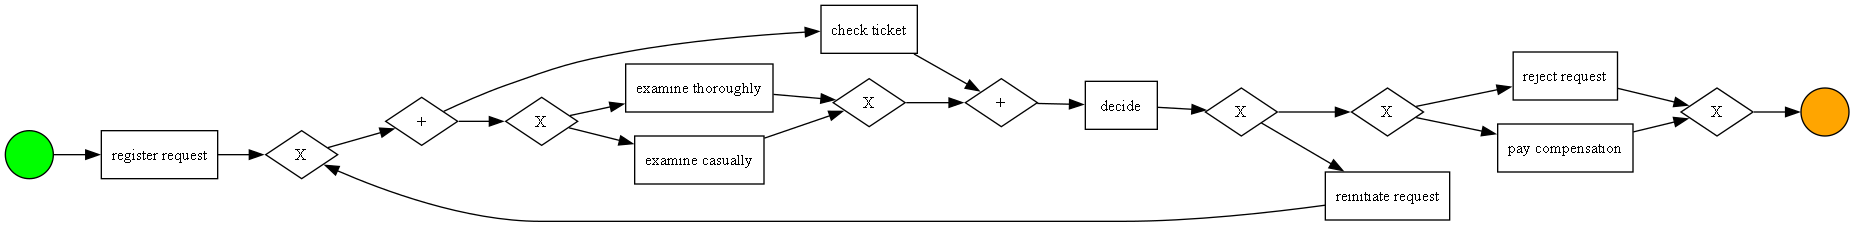

In [77]:
bpmn_model_1 = pm4py.discover_bpmn_inductive(logs)
pm4py.view_bpmn(bpmn_model_1)

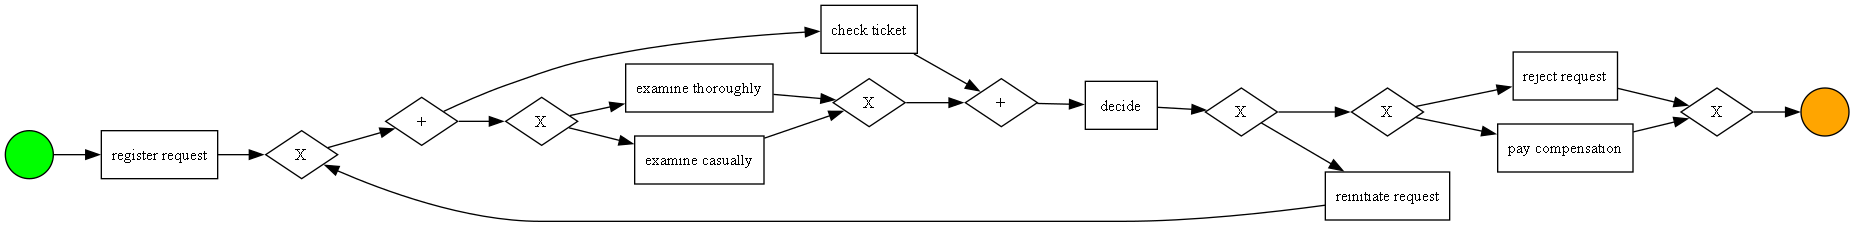

In [79]:
# Построение модели BPMN через Process tree
bpmn_model_2 = pm4py.convert_to_bpmn(process_tree)
pm4py.view_bpmn(bpmn_model_2)

### DFG

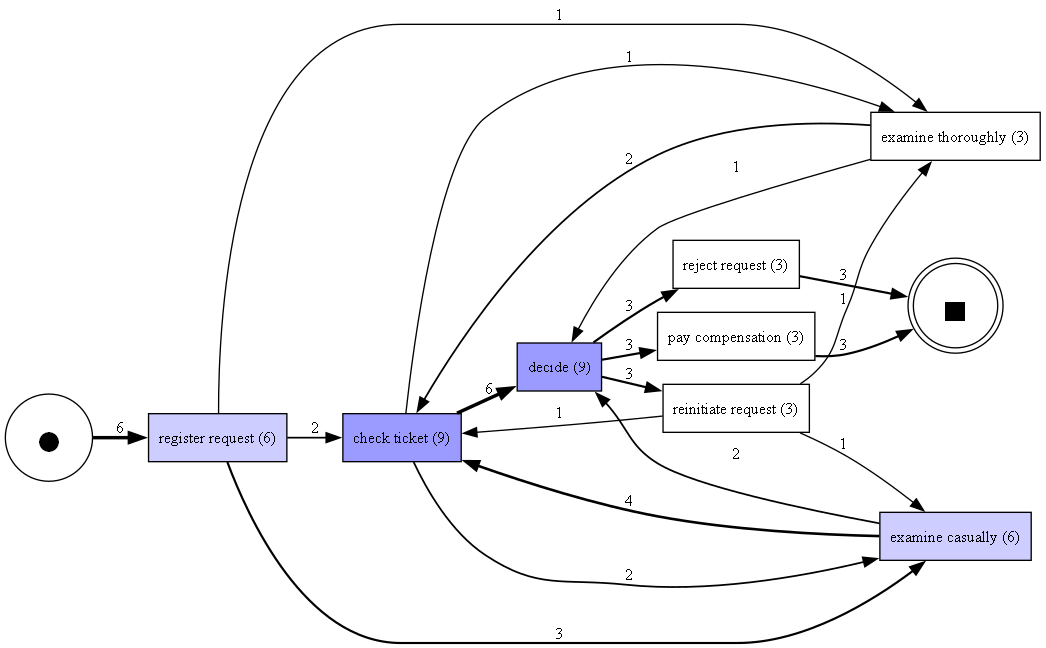

In [82]:
dfg, start, end = pm4py.discover_dfg(logs)
pm4py.view_dfg(dfg, start, end)

### Heuristics Miner

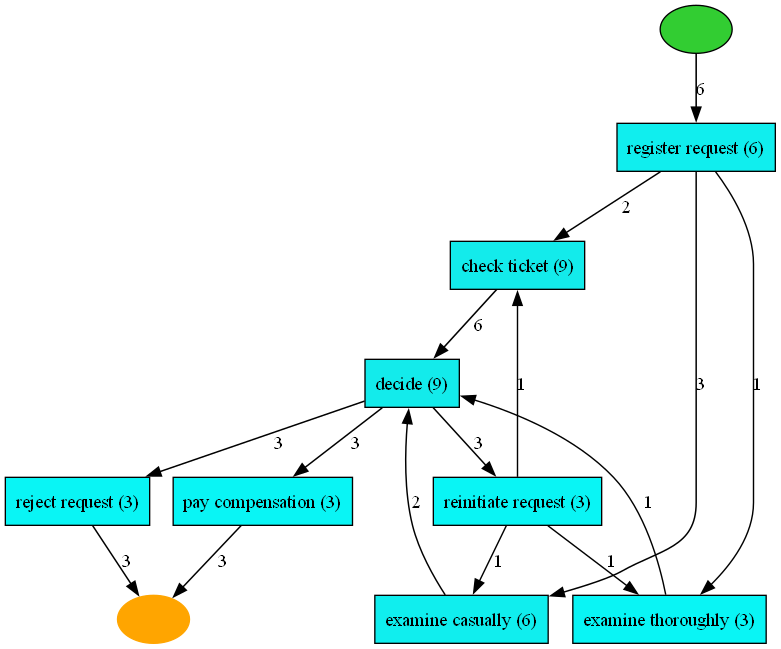

In [85]:
heuristics_map = pm4py.discover_heuristics_net(logs)
pm4py.view_heuristics_net(heuristics_map)

### Petri net

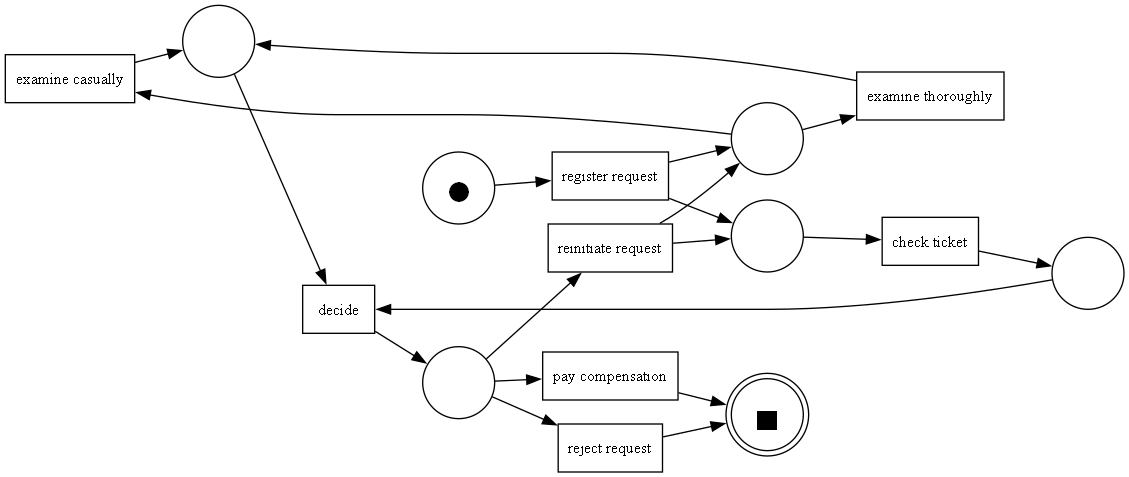

In [88]:
net_1, im_1, fm_1 = pm4py.discover_petri_net_alpha(logs)
pm4py.view_petri_net(net_1, im_1, fm_1)

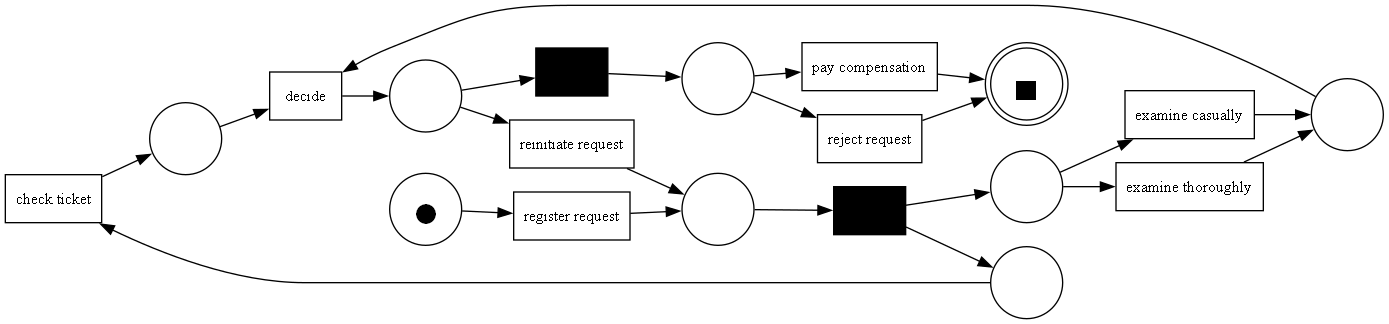

In [90]:
net_2, im_2, fm_2 = pm4py.convert_to_petri_net(process_tree)
pm4py.view_petri_net(net_2, im_2, fm_2)